# Introduction to Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/horas_vs_nota.csv",index_col=0)

In [3]:
df.head()

,horas_de_estudio,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


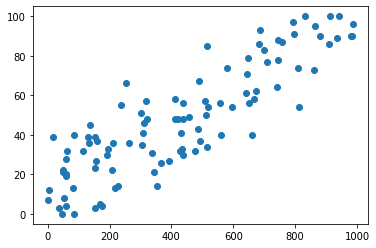

In [4]:
plt.scatter(df["horas_de_estudio"],df["nota"]);

### Polynomial regression

$ y = b + a_{1}x + a_{2}x^2 + \cdots + a_{k}x^{k} + e $

$Ma=b$

$\begin{bmatrix} \sum_{i=1}^{N} x_i^0 & \sum_{i=1}^{N} x_i & \cdots & \sum_{i=1}^{N} x_i^k \\ \sum_{i=1}^{N} x_i & \sum_{i=1}^{N} x_i^2 & \cdots & \sum_{i=1}^{N} x_i^{k+1} \\ \vdots & \vdots & \vdots & \vdots \\ \sum_{i=1}^{N} x_i^k & \sum_{i=1}^{N} x_i^{k+1} & \cdots & \sum_{i=1}^{N} x_i^{2k} \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_k \\ \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^{N} x_i^0y_i \\ \sum_{i=1}^{N} x_i y_i \\ \vdots \\ \sum_{i=1}^{N} x_i^k y_i \\ \end{bmatrix}$

In [5]:
def row(data,row_number,k):
    return [sum([e**(row_number+i) for e in data])for i in range(k+1)]

def matrix_m(data,k):
    return np.array([row(data, i, k) for i in range(k+1)], dtype='float')

In [6]:
def vector_b(x,y,k):
    return np.array([sum((x**i)*y) for i in range(k+1)], dtype='float')

In [7]:
M = matrix_m(df["horas_de_estudio"], k=1)
M

array([[1.0000000e+02, 4.2854000e+04],
       [4.2854000e+04, 2.6419576e+07]])

In [8]:
b = vector_b(df["horas_de_estudio"], df["nota"], k=1)

In [9]:
coef = np.linalg.solve(M,b)

In [10]:
coef

array([11.78070718,  0.08437787])

In [11]:
def predict(x,coef):
    return sum([(x**i)*coef[i] for i in range(len(coef))])

In [12]:
x = np.arange(0,1001, 1)
y_pred = predict(x,coef)

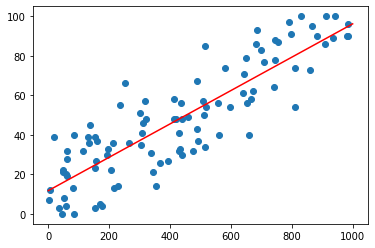

In [13]:
plt.scatter(df["horas_de_estudio"],df["nota"])
plt.plot(x, y_pred, c="r");

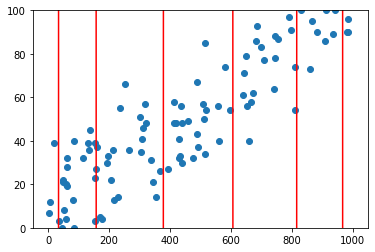

In [14]:
k=6
M = matrix_m(df["horas_de_estudio"], k)
b = vector_b(df["horas_de_estudio"], df["nota"], k)
coef = np.linalg.solve(M,b)
x = np.arange(0,1001, 1)
y_pred = predict(x,coef)
plt.scatter(df["horas_de_estudio"],df["nota"])
plt.plot(x, y_pred, c="r")
plt.ylim(0,100);

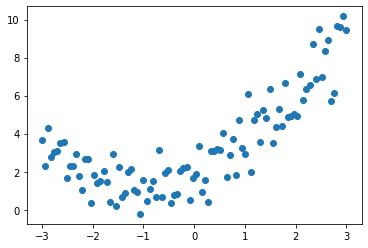

In [15]:
data_x = np.linspace(-3,3,100)
data_y =  .5*data_x**2 + data_x + 2 + np.random.normal(0,1,len(data_x))
plt.scatter(data_x,data_y);

In [16]:
y = {}
x = np.linspace(-3,3,200)
for i in [1, 2, 25, 300]:
    M = matrix_m(data_x,i)
    b = vector_b(data_x,data_y,i)
    coef = np.linalg.solve(M,b)
    y[i] = predict(x,coef)

''

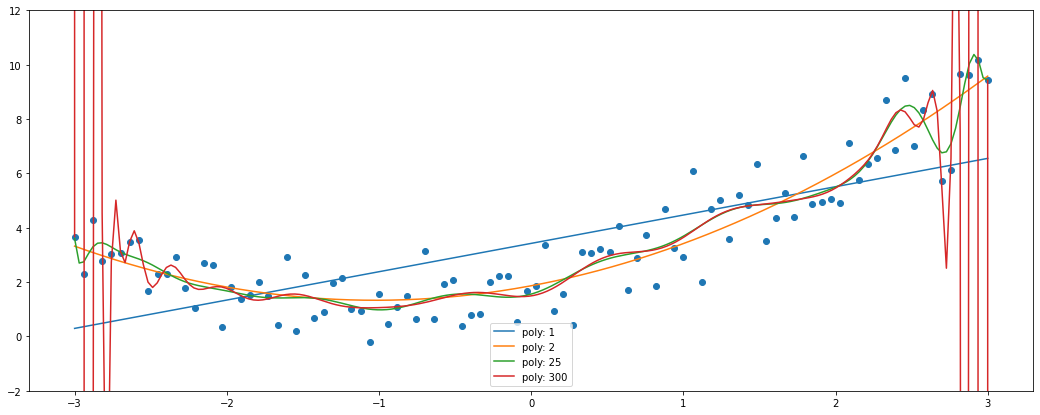

In [17]:
plt.figure(figsize=(18,7))
plt.scatter(data_x,data_y)
for i in y.keys():
    plt.plot(x,y[i], label=f"poly: {i}")
plt.legend()
plt.ylim([-2,12])
;

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y)

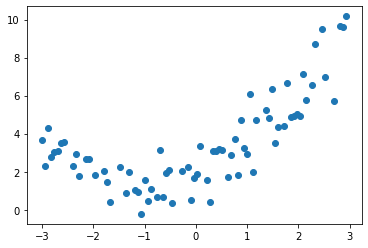

In [20]:
plt.scatter(X_train,y_train);

In [21]:
coef = {}
for i in [1, 2, 25, 300]:
    M = matrix_m(X_train,i)
    b = vector_b(X_train,y_train,i)
    coef[i] = np.linalg.solve(M,b)

''

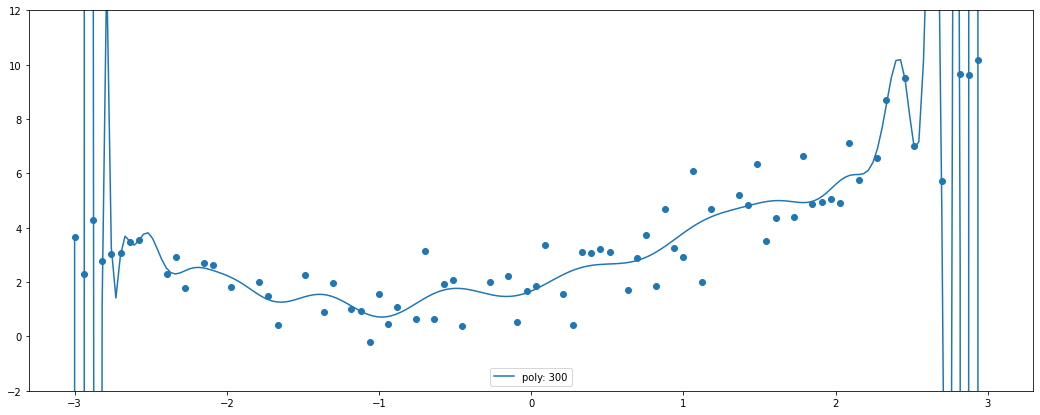

In [22]:
i = 300
x = np.linspace(-3,3, 200)
plt.figure(figsize=(18,7))
plt.scatter(X_train,y_train)
plt.plot(x,predict(x,coef[i]), label=f"poly: {i}")
plt.legend()
plt.ylim([-2,12])
;

In [23]:
error = pd.DataFrame(columns=["train_mse", "test_mse"])

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
for i in coef.keys():
    #Train set
    y_pred_train = predict(X_train, coef[i])
    mse_train = mean_squared_error(y_train, y_pred_train)
    #Test set
    y_pred_test = predict(X_test, coef[i])
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name=i))

In [26]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
error

,train_mse,test_mse
1,3.119,2.354
2,0.952,0.969
25,0.721,7.812
300,0.623,148030591307790.406


### Regression Metrics (MAE, MSE, RMSE, LOGMSE)
These metrics are not absolute!!! They are used for comparing different models.

You must compare different models with the `SAME` metric.

### Boston Housing

In [27]:
from sklearn.datasets import load_boston

In [28]:
X,y = load_boston(return_X_y=True)

In [29]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [30]:
col_names = load_boston()["feature_names"]

In [31]:
df = pd.DataFrame(X, columns=col_names)

In [32]:
df["MEDV"] = y

In [33]:
corr = df.corr()

In [34]:
corr["MEDV"].sort_values()

LSTAT     -0.738
PTRATIO   -0.508
INDUS     -0.484
TAX       -0.469
NOX       -0.427
CRIM      -0.388
RAD       -0.382
AGE       -0.377
CHAS       0.175
DIS        0.250
B          0.333
ZN         0.360
RM         0.695
MEDV       1.000
Name: MEDV, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["MEDV"]), df["MEDV"])

In [50]:
error = pd.DataFrame(columns=["train_mse", "test_mse"])

In [51]:
lr1 = LinearRegression()
## ONLY RM
lr1.fit(X_train["RM"].to_frame(), y_train)
mse_train = mean_squared_error(y_train, lr1.predict(X_train["RM"].to_frame()))
mse_test = mean_squared_error(y_test, lr1.predict(X_test["RM"].to_frame()))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="RM"))

In [52]:
lr2 = LinearRegression()
## ONLY LSTAT
lr2.fit(X_train["LSTAT"].to_frame(), y_train)
mse_train = mean_squared_error(y_train, lr2.predict(X_train["LSTAT"].to_frame()))
mse_test = mean_squared_error(y_test, lr2.predict(X_test["LSTAT"].to_frame()))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="LSTAT"))

In [53]:
lr3 = LinearRegression()
## ONLY RM AND LSTAT
lr3.fit(X_train[["RM","LSTAT"]], y_train)
mse_train = mean_squared_error(y_train, lr3.predict(X_train[["RM","LSTAT"]]))
mse_test = mean_squared_error(y_test, lr3.predict(X_test[["RM","LSTAT"]]))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="RM & LSTAT"))

In [54]:
lr4 = LinearRegression()
## ALL COLUMNS
lr4.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, lr4.predict(X_train))
mse_test = mean_squared_error(y_test, lr4.predict(X_test))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="All columns"))

In [55]:
error

,train_mse,test_mse
RM,39.626,55.464
LSTAT,39.766,34.742
RM & LSTAT,29.698,33.581
All columns,20.863,26.148


In [43]:
X_train.shape

(379, 13)

In [56]:
# Feature Cross
columns = X_train.columns
for i in range(len(columns)):
    for j in range(i,len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        X_train[f"{col1}*{col2}"] = X_train[col1]*X_train[col2]
        X_test[f"{col1}*{col2}"] = X_test[col1]*X_test[col2]

In [57]:
X_train.shape

(379, 104)

In [58]:
lr5 = LinearRegression()
## ALL COLUMNS + SYNTHETIC
lr5.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, lr5.predict(X_train))
mse_test = mean_squared_error(y_test, lr5.predict(X_test))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="All + Synthetic Columns"))

In [59]:
error

,train_mse,test_mse
RM,39.626,55.464
LSTAT,39.766,34.742
RM & LSTAT,29.698,33.581
All columns,20.863,26.148
All + Synthetic Columns,5.489,9.931


In [60]:
import seaborn as sns

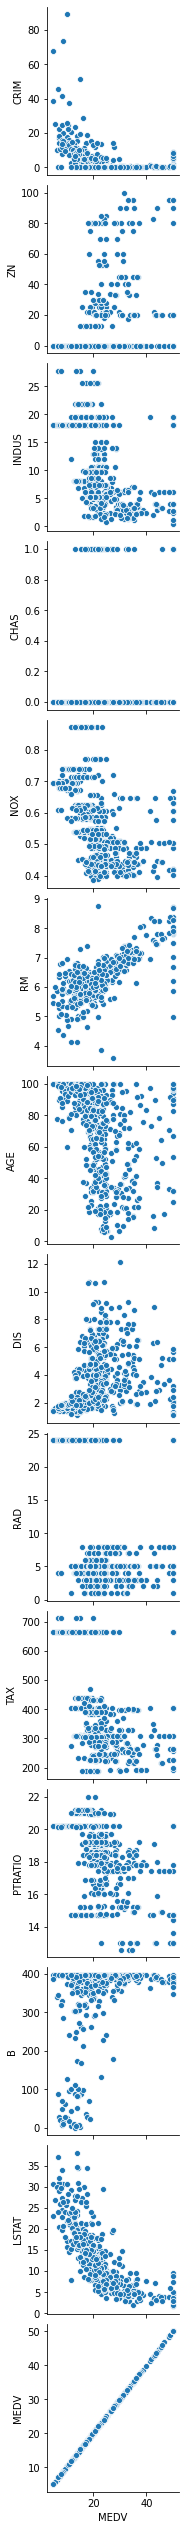

In [61]:
sns.pairplot(df, x_vars=["MEDV"], y_vars=df.columns);

In [62]:
synth = df.copy()
columns = synth.columns
for i in range(len(columns)-1):
    for j in range(i,len(columns)-1):
        col1 = columns[i]
        col2 = columns[j]
        synth[f"{col1}*{col2}"] = synth[col1]*synth[col2]

In [63]:
synth.shape

(506, 105)

In [64]:
synth.corr()["MEDV"].abs().sort_values(ascending=False).head(10)

MEDV            1.000
PTRATIO*LSTAT   0.750
LSTAT           0.738
RM*LSTAT        0.730
RM*RM           0.718
NOX*LSTAT       0.701
RM              0.695
TAX*LSTAT       0.675
AGE*LSTAT       0.671
INDUS*LSTAT     0.652
Name: MEDV, dtype: float64

In [68]:
synth.corr()["MEDV"]["PTRATIO"]

-0.507786685537561

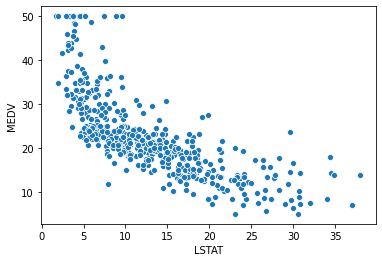

In [69]:
sns.scatterplot(synth["LSTAT"], synth["MEDV"]);

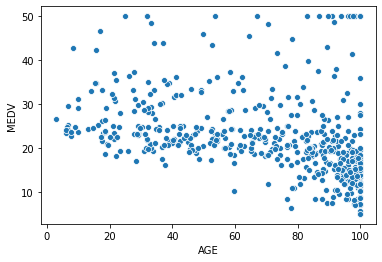

In [70]:
sns.scatterplot(synth["AGE"], synth["MEDV"]);

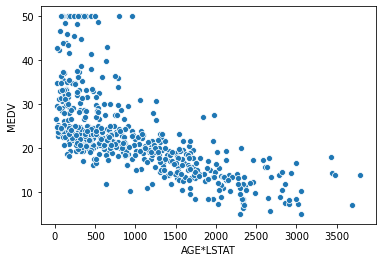

In [71]:
sns.scatterplot(synth["AGE*LSTAT"], synth["MEDV"]);

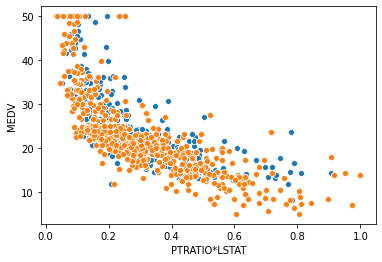

In [72]:
sns.scatterplot(synth["LSTAT"]/synth["LSTAT"].max(), synth["MEDV"])
sns.scatterplot(synth["PTRATIO*LSTAT"]/synth["PTRATIO*LSTAT"].max(), synth["MEDV"]);

### Further Resources
- [Regularization](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)

### What happens when we feature cross?

Let's create a few circles

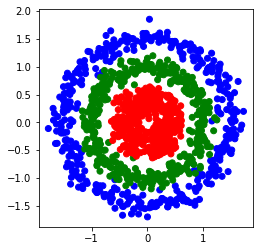

In [124]:
theta = np.linspace(0, 2*np.pi, 400)

r_outmost = 1.5

# Outmost circle
x_outmost = r_outmost*np.cos(theta) + np.random.normal(0,.1,400)
y_outmost = r_outmost*np.sin(theta) + np.random.normal(0,.1,400)


r_out = 1

# Outter circle
x_out = r_out*np.cos(theta) + np.random.normal(0,.1,400)
y_out = r_out*np.sin(theta) + np.random.normal(0,.1,400)

r_in = .4

# Inner circle
x_in = r_in*np.cos(theta) + np.random.uniform(-.25,.25,400)
y_in = r_in*np.sin(theta) + np.random.uniform(-.25,.25,400)

x = np.concatenate([x_outmost,x_out,x_in])
y = np.concatenate([y_outmost,y_out,y_in])

color = ["b"]*400+["g"]*400+["r"]*400

fig, ax = plt.subplots(1)
ax.scatter(x, y, c=color)
ax.set_aspect(1)
plt.show()

### Let's now plot $x^2 _x y^2$

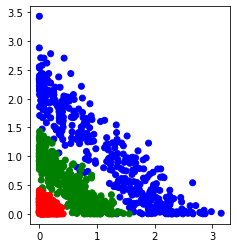

In [125]:
fig, ax = plt.subplots(1)
ax.scatter(x**2, y**2, c=color)
ax.set_aspect(1)
plt.show()